Prediction of original diabetes data
===============================

## Imports

Importing needed packages:

In [128]:
import pandas 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report


# turn of warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [129]:
data= pandas.read_csv('../original_data/diabetes.csv', index_col=0);

display(data.head())


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


## Data preparation


In [130]:
target=data['Outcome']
data=data.drop(['Outcome'],axis=1)
## One-Hot Encoding
enc2 = np.array(['Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction'])

##naive bayes data -> encoding all values because of the use of Bernouli NB
nb_data=pandas.get_dummies(data,columns=list(data.columns))

## saving the labels
labels= list(data.columns)

## Splitting the data in train and test data

In [131]:
# splitting data for rf
train_pred, test_pred, train_target, test_target = train_test_split(data, target, test_size=0.33,random_state=42)

#splitting data for nb
nb_train_pred, nb_test_pred, nb_train_target, nb_test_target = train_test_split(nb_data, target, test_size=0.33,random_state=42)

display(list(set(nb_test_pred.columns)-set(nb_train_pred.columns)))
## Transform everythin to np.array
train_pred=np.array(train_pred)
train_target=np.array(train_target)

test_pred=np.array(test_pred)
test_target=np.array(test_target)


nb_test_pred=np.array(nb_test_pred)
nb_train_pred=np.array(nb_train_pred)


[]

## Random Forest

Finding right amount of trees:

In [132]:
rf_range = range(40, 70)

# list of scores from k_range
rf_scores = []

# 1. we will loop through reasonable values of k
for k in rf_range:
    # 2. run KNeighborsClassifier with k neighbours
    classifier = RandomForestClassifier(random_state=42,n_estimators=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(classifier, train_pred, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    rf_scores.append(scores.mean())
print(rf_scores)

[0.760708898944193, 0.7548642533936651, 0.7549019607843137, 0.7510935143288083, 0.7530165912518854, 0.7549773755656108, 0.7626319758672699, 0.7568627450980392, 0.7588235294117647, 0.7608220211161387, 0.7647058823529411, 0.766628959276018, 0.7685143288084465, 0.7665912518853695, 0.7723981900452488, 0.768552036199095, 0.7684766214177979, 0.7665158371040725, 0.7665158371040723, 0.7607466063348417, 0.7703619909502263, 0.7664781297134239, 0.7683634992458522, 0.7703619909502263, 0.7684012066365007, 0.7665158371040723, 0.7645173453996984, 0.7606334841628959, 0.7606334841628959, 0.7645173453996984]


Text(0, 0.5, 'Cross-Validated Accuracy')

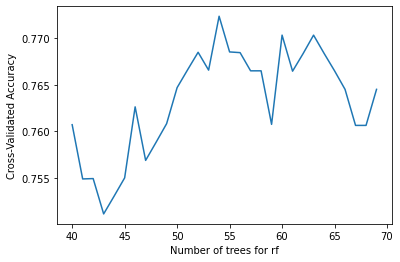

In [133]:
plt.plot(rf_range, rf_scores)
plt.xlabel('Number of trees for rf')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

In [134]:
classifier = RandomForestClassifier(random_state=42,n_estimators=56)
classifier = classifier.fit(train_pred,train_target)

rf_rediction = classifier.predict(test_pred)

difference = rf_rediction - test_target

Displaying feature importance:

In [135]:
feature_importances = pandas.DataFrame(classifier.feature_importances_,
                                   index = labels,
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances.head(20))

,importance
Glucose,0.289378
BMI,0.182276
Age,0.168128
DiabetesPedigreeFunction,0.123924
BloodPressure,0.092014
SkinThickness,0.072926
Insulin,0.071353


#### Performance meassure

In [136]:
print('Total number of predictions:' + str(len(rf_rediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(difference))) 
print('Accuracy: '+ str(((len(rf_rediction) - np.count_nonzero(difference))/len(rf_rediction))*100)+' %')


Total number of predictions:254
Total number of wrong predictions:62
Accuracy: 75.59055118110236 %


In [137]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(rf_rediction, test_target)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,137,31
Actual Positive,31,55


In [138]:
print(classification_report( test_target,rf_rediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.64      0.64      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



## Naive Bayes
Train & predict with model

In [139]:

model = BernoulliNB()
model = model.fit(nb_train_pred,nb_train_target)

naive_prediction= model.predict(nb_test_pred)
naive_difference = naive_prediction - nb_test_target

#### Performance meassure

In [140]:
print('Total number of predictions:' + str(len(naive_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(naive_difference))) 
print('Accuracy: '+ str(((len(naive_prediction) - np.count_nonzero(naive_difference))/len(naive_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(nb_test_target, naive_prediction))


Total number of predictions:254
Total number of wrong predictions:82
Accuracy: 67.71653543307087 %
Accuracy: 0.6771653543307087


In [141]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,naive_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,154,14
Actual Positive,68,18


In [142]:
print(classification_report( test_target,naive_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       168
           1       0.56      0.21      0.31        86

    accuracy                           0.68       254
   macro avg       0.63      0.56      0.55       254
weighted avg       0.65      0.68      0.63       254



## KNN 
Finding the right k

In [143]:
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, train_pred, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6690045248868778, 0.7122549019607843, 0.7180618401206637, 0.7239819004524887, 0.7297134238310709, 0.7355957767722472, 0.7354826546003017, 0.7315610859728506, 0.7373680241327301, 0.725603318250377, 0.7391779788838612, 0.725603318250377, 0.7237933634992458, 0.7177978883861237, 0.7120663650075415, 0.7236425339366516, 0.7373680241327301, 0.7353695324283559, 0.7353318250377073, 0.73736802413273, 0.7354449472096531, 0.7296757164404223, 0.7296757164404223, 0.723868778280543, 0.7275641025641025, 0.7199095022624434, 0.7256787330316742, 0.7198717948717949, 0.7236425339366516, 0.7315987933634992]


Text(0, 0.5, 'Cross-Validated Accuracy')

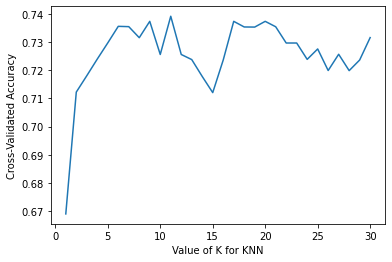

In [144]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Train and predict with model

In [145]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(train_pred, train_target)

knn_prediction=knn_model.predict(test_pred)
knn_difference = knn_prediction - test_target

#### Performance meassure

In [146]:
print('Total number of predictions:' + str(len(knn_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(knn_difference))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(knn_difference))/len(knn_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, knn_prediction))


Total number of predictions:254
Total number of wrong predictions:68
Accuracy: 73.22834645669292 %
Accuracy: 0.7322834645669292


In [147]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(test_target,knn_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,147,21
Actual Positive,47,39


In [148]:
#metricy
print(classification_report( test_target,knn_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       168
           1       0.65      0.45      0.53        86

    accuracy                           0.73       254
   macro avg       0.70      0.66      0.67       254
weighted avg       0.72      0.73      0.72       254



## Voting Classifier
Calculating voting:

In [149]:
voting_pred=[]
i=0
while i < len(rf_rediction):
    tmp=rf_rediction[i]+naive_prediction[i]+knn_prediction[i]
    if tmp>1:
        voting_pred.append(1)
    else:
        voting_pred.append(0)
    i += 1
voting_diff=voting_pred-test_target

#### Performance meassure

In [150]:
print('Total number of predictions:' + str(len(voting_pred)))
print('Total number of wrong predictions:' + str(np.count_nonzero(voting_diff))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(voting_diff))/len(voting_pred))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, voting_pred))


Total number of predictions:254
Total number of wrong predictions:61
Accuracy: 75.98425196850394 %
Accuracy: 0.7598425196850394


In [151]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,voting_pred,)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,151,17
Actual Positive,44,42


In [152]:
#metrics
print(classification_report( test_target,voting_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       168
           1       0.71      0.49      0.58        86

    accuracy                           0.76       254
   macro avg       0.74      0.69      0.71       254
weighted avg       0.75      0.76      0.75       254

